# Statistics for the found jet clusters
In this jupyter notebook you can look at the properties of the extracted jet clusters. The properties can be read in through the csv file found in export, made in BoxTheJets/Find_export_jet_clusters.ipynb. The test set uses eps=3.0, time_eps=2.0 but this can be varied if wanted to make different sets of Jet clusters.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [9]:
file_path = 'BoxTheJets/exports/Jet_clusters_3.0_2.0_paperID.csv'
Cluster_date = np.loadtxt(file_path, delimiter=',',
                          unpack=True, usecols=1, dtype='datetime64')
Cluster_SOL = np.loadtxt(file_path, delimiter=',',
                         unpack=True, usecols=2, dtype=str)
stat_dur, stat_Bx, std_Bx, stat_By, std_By, stat_Lon, stat_Lat, stat_H, upper_H, lower_H, stat_W, std_W, stat_vel, stat_sigma, flags = np.loadtxt(
    file_path, delimiter=',', unpack=True, usecols=(3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17), dtype=float)
print(len(Cluster_date))

881


In [10]:
def make_statistics_folder():
    path = 'SOL/statistics/'
    # check if folder for plots exists
    isExist = os.path.exists(path)
    if not isExist:
        os.makedirs(path)
        print("statistics directory is created")


make_statistics_folder()

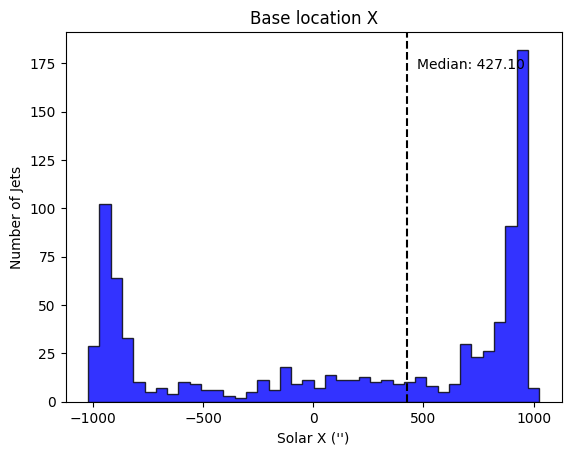

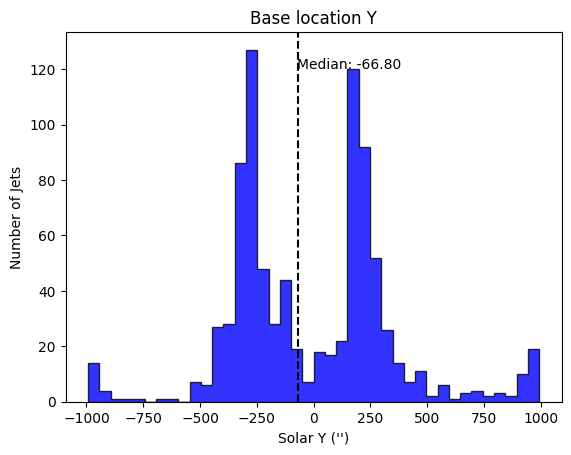

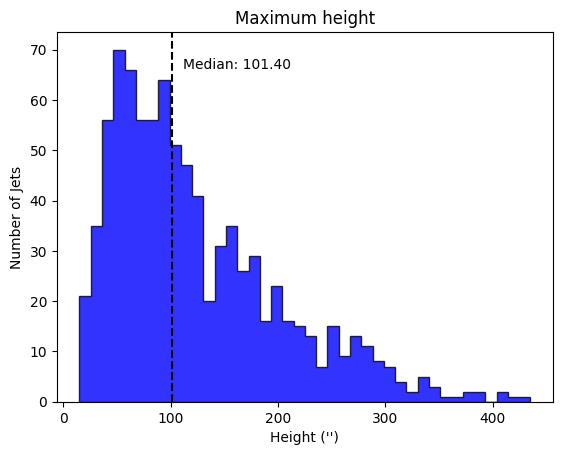

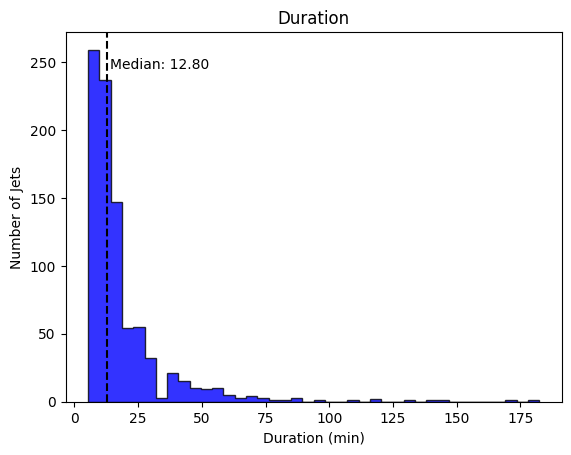

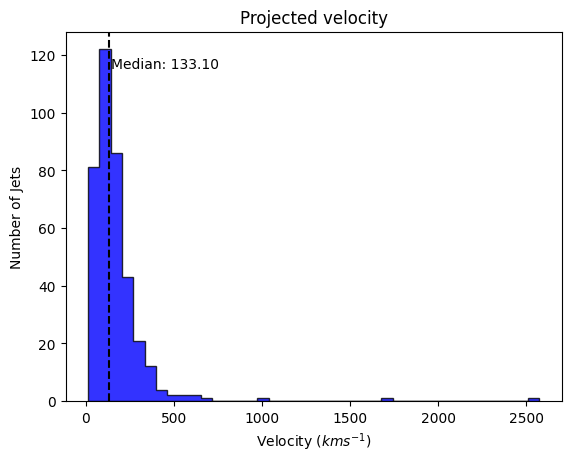

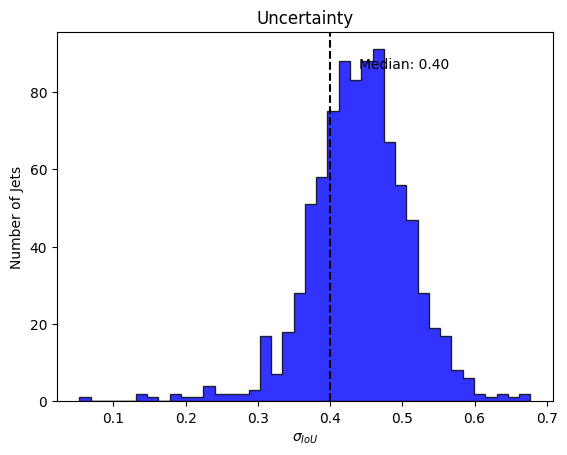

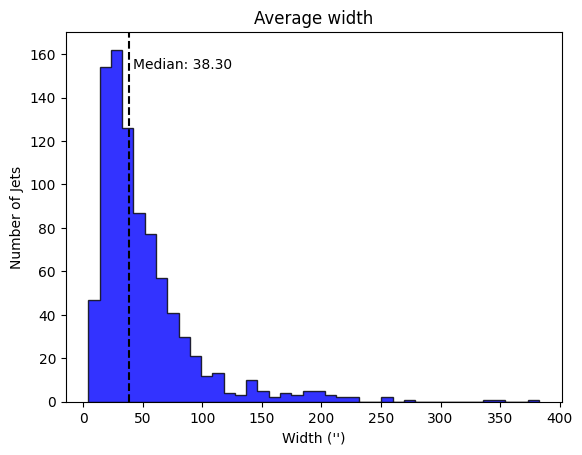

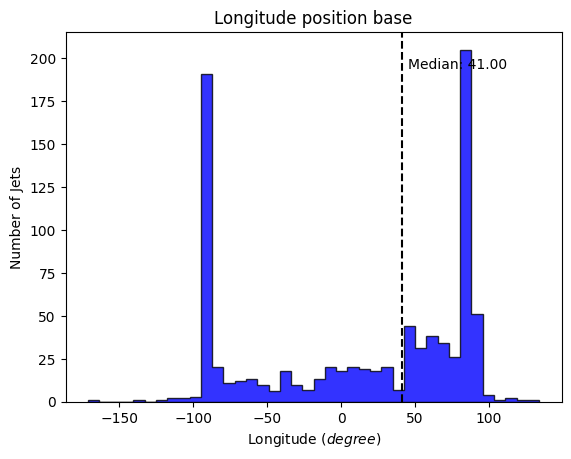

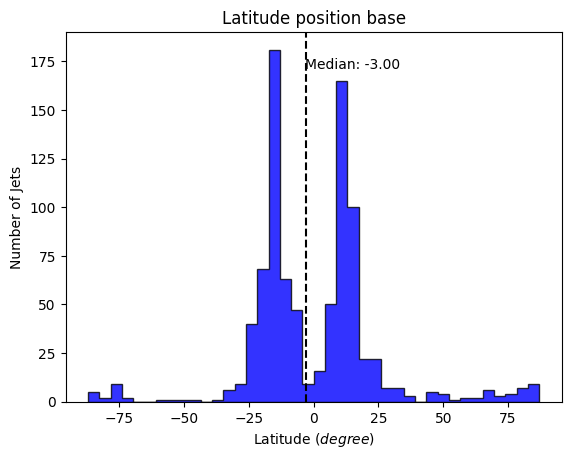

In [11]:
histo = [stat_Bx, stat_By, stat_H, stat_dur, stat_vel*725, stat_sigma, stat_W, stat_Lon, stat_Lat]
title = ['Base location X', 'Base location Y', 'Maximum height', 'Duration', 'Projected velocity',
         'Uncertainty', 'Average width', 'Longitude position base', 'Latitude position base']
xlabel = ['Solar X (\'\')', 'Solar Y (\'\')', 'Height (\'\')', 'Duration (min)',
          'Velocity ($km s^{-1}$)', '$\sigma_{IoU}$', 'Width (\'\')', 'Longitude ($degree$)', 'Latitude ($degree$)']
# stat_Bxstd,stat_Bystd,stat_Hstd
for l in range(len(histo)):
    plt.ylabel('Number of Jets')
    plt.title(title[l])
    plt.hist(histo[l], histtype='stepfilled', color='blue', alpha=0.8,
             bins=40, ec="k")  # bins=30,color='red',alpha=0.8)
    plt.xlabel(xlabel[l])
    Med = np.round(np.nanmedian(histo[l]), 1)
    plt.axvline(Med, color='k', linestyle='dashed', linewidth=1.5)
    min_ylim, max_ylim = plt.ylim()
    plt.text(Med*1.1, max_ylim*0.9, 'Median: {:.2f}'.format(Med))
    plt.savefig(f'SOL/statistics/stats_{title[l]}_11-16.pdf', dpi=300)
    plt.show()

In [12]:
print('    & Mean & Std Dev & Median & Min & Max \\\\ \hline')
print('H$^{304\,\AA}$ & ', np.round(np.average(stat_H), 1), '&', np.round(np.std(stat_H), 1), '&', np.round(
    np.median(stat_H), 1), '&', np.round(np.min(stat_H), 1), '&', np.round(np.max(stat_H), 1), '\\\\')
print('W$^{304\,\AA}$ &', np.round(np.average(stat_W), 1), '&', np.round(np.std(stat_W), 1), '&', np.round(
    np.median(stat_W), 1), '&', np.round(np.min(stat_W), 1), '&', np.round(np.max(stat_W), 1), '\\\\')
print('D$^{304\,\AA}$ &', np.round(np.average(stat_dur), 1), '&', np.round(np.std(stat_dur), 1), '&', np.round(
    np.median(stat_dur), 1), '&', np.round(np.min(stat_dur), 1), '&', np.round(np.max(stat_dur), 1), '\\\\')
print('V$^{304\,\AA}$ &', np.round(np.nanmean(stat_vel*725), 1), '&', np.round(np.nanstd(stat_vel*725), 1), '&', np.round(
    np.nanmedian(stat_vel*725), 1), '&', np.round(np.nanmin(stat_vel*725), 1), '&', np.round(np.nanmax(stat_vel*725), 1), '\\\\')
print('Lat &', np.round(np.average(stat_Lat), 1), '&', np.round(np.std(stat_Lat), 1), '&', np.round(
    np.median(stat_Lat), 1), '&', np.round(np.min(stat_Lat), 1), '&', np.round(np.max(stat_Lat), 1), '\\\\')
print('Lon &', np.round(np.average(stat_Lon), 1), '&', np.round(np.std(stat_Lon), 1), '&', np.round(
    np.median(stat_Lon), 1), '&', np.round(np.min(stat_Lon), 1), '&', np.round(np.max(stat_Lon), 1), '\\\\')

    & Mean & Std Dev & Median & Min & Max \\ \hline
H$^{304\,\AA}$ &  123.9 & 78.9 & 101.4 & 15.2 & 434.9 \\
W$^{304\,\AA}$ & 51.0 & 43.3 & 38.3 & 4.3 & 382.8 \\
D$^{304\,\AA}$ & 18.3 & 18.3 & 12.8 & 5.4 & 182.4 \\
V$^{304\,\AA}$ & 168.7 & 184.7 & 133.1 & 14.7 & 2572.5 \\
Lat & -0.1 & 24.6 & -3.0 & -87.0 & 87.0 \\
Lon & 12.4 & 73.1 & 41.0 & -171.0 & 134.0 \\


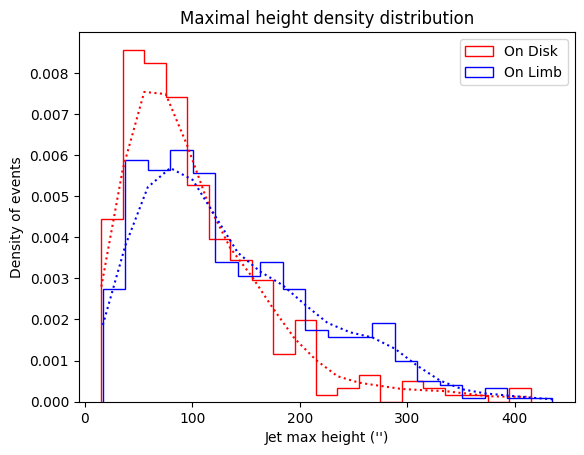

In [13]:
import scipy.stats as stats

radial_distance = np.sqrt(stat_Bx**2+stat_By**2)
on_disk = radial_distance < 900
on_limb = radial_distance > 900
n_disk, x_disk, _ = plt.hist(stat_H[on_disk], histtype='step',
                             bins=20, ec="red", label='On Disk', density=True)
n_limb, x_limb, _ = plt.hist(stat_H[on_limb], histtype='step',
                             bins=20, ec="blue", label='On Limb', density=True)

density_disk = stats.gaussian_kde(stat_H[on_disk])
density_limb = stats.gaussian_kde(stat_H[on_limb])

plt.plot(x_disk, density_disk(x_disk), c='red', linestyle='dotted')
plt.plot(x_limb, density_limb(x_limb), c='blue', linestyle='dotted')

plt.title("Maximal height density distribution")
plt.legend()
plt.xlabel('Jet max height (\'\')')
plt.ylabel('Density of events')
# plt.savefig('SOL/statistics/stats_density_distribution.pdf',dpi=300)
plt.show()

/home/rsankar/.conda/envs/solarjets/lib/python3.10/site-packages/astropy/visualization/wcsaxes/core.py:359: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  return super().plot(*args, **kwargs)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


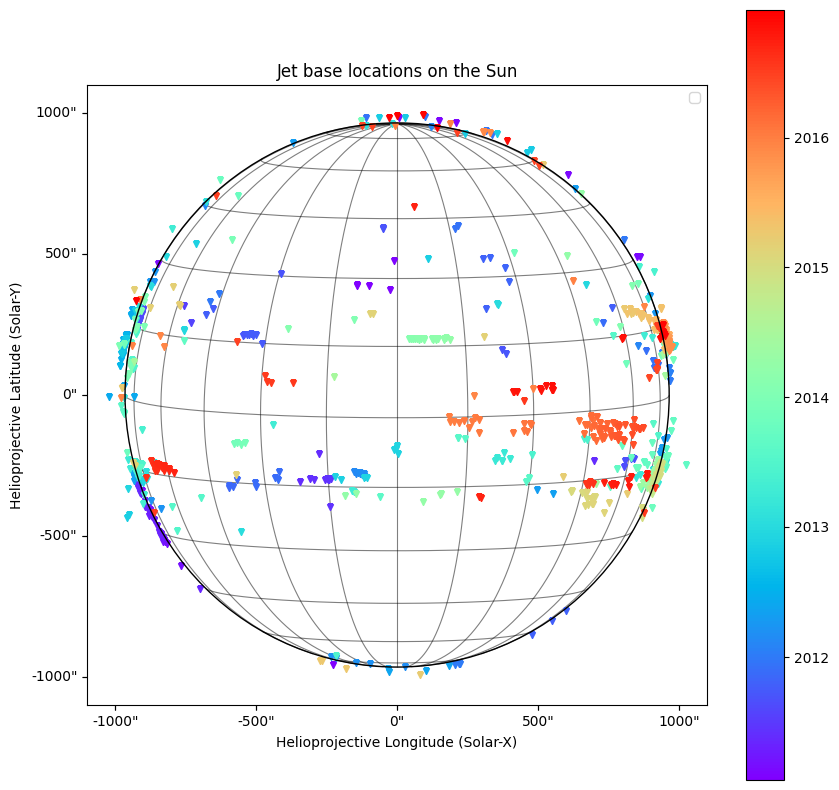

In [14]:
import astropy.units as u
from astropy.coordinates import SkyCoord
from matplotlib import dates
import sunpy.map
from sunpy.coordinates import frames
from matplotlib import cm

data = np.full((10, 10), np.nan)

# Define a reference coordinate and create a header using sunpy.map.make_fitswcs_header
skycoord = SkyCoord(0*u.arcsec, 0*u.arcsec, obstime='2013-10-28',
                    observer='earth', frame=frames.Helioprojective)

# Scale set to the following for solar limb to be in the field of view
header = sunpy.map.make_fitswcs_header(data, skycoord, scale=[220, 220]*u.arcsec/u.pixel)

# Use sunpy.map.Map to create the blank map
blank_map = sunpy.map.Map(data, header)

fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(projection=blank_map)
blank_map.plot()
blank_map.draw_limb(color="k")
blank_map.draw_grid(color="k")

xc = stat_Bx * u.arcsec
yc = stat_By * u.arcsec
colours = cm.rainbow(np.linspace(0, 1, len((Cluster_date))))
# Plot the coordinates of the base points per year
coords = SkyCoord(xc, yc, frame=blank_map.coordinate_frame)
epoch = [Cluster_date[k].astype('datetime64[D]').astype(
    'int')/365 + 1970 for k in range(len(Cluster_date))]

im = ax.scatter(stat_Bx*0, stat_By*0, c=dates.date2num(Cluster_date),
                cmap='rainbow', s=0, marker='v')

for i in range(len(xc)):
    ax.plot_coord(coords[i], 'o', markersize=5, c=colours[i], marker='v')

# p_overplot = ax.plot_coord(coords[on_limb], 'o', markersize=7, c='b', marker='v')
# Set title.
ax.set_title('Jet base locations on the Sun')
plt.legend()
# plt.colorbar()
cbar = fig.colorbar(im, ticks=dates.date2num(
    ['2011', '2012', '2013', '2014', '2015', '2016', '2017']))

cbar.ax.set_yticklabels(['2011', '2012', '2013', '2014', '2015', '2016', '2017'])

plt.savefig('SOL/statistics/Solar_map_paper.pdf', dpi=300)
plt.show()